# Python as a Financial Calculator 

## Time Value of Money (Basic Python)

### Present value of single cashflow

$$PV=\frac{FV}{(1+r)^n}$$

In [1]:
def pv(fv, r, n):
    '''
    Present value of a single cashflow
    
    -------
    
    fv : future value
    r : interest rates
    n : number of periods
    '''
    return fv / (1+r)**n

In [2]:
pv(100, 0.01, 1)

99.00990099009901

In [3]:
pv(100, 0.01, 0)

100.0

In [ ]:
pv?

### Present value of perpetuity

$$PV = \frac{c}{r}$$

In [5]:
def pv_perpetuity(c, r):
    '''
    Present value of perpetuity
    
    -----
    
    c : cashflow
    f: interest rates
    '''
    return c / r

In [6]:
pv_perpetuity(100, 0.01)

10000.0

In [7]:
int_range = [0.01, 0.02, 0.05, 0.1]

In [17]:
for int_ in int_range:
    print("[INFO] Interest Rate = {0}%, Present Value = {1}".format(int_ * 100, pv_perpetuity(100, int_)))

[INFO] Interest Rate = 1.0%, Present Value = 10000.0
[INFO] Interest Rate = 2.0%, Present Value = 5000.0
[INFO] Interest Rate = 5.0%, Present Value = 2000.0
[INFO] Interest Rate = 10.0%, Present Value = 1000.0


### Present value of cashflow with constant growth

In [47]:
def pv_constant_growth(c, r, g):
    '''
    Present value of cashflow with constant growth
    Often used in calculating present value of dividend paying company with constant growth
    -----
    
    c : first cash flow
    r : discount rate / interest rates
    g : growth rate
    '''
    if r < g:
        print("Unable to compute because the required rate of return is lower than the growth rate")
    else:
        return c / (r - g)    

In [48]:
pv_constant_growth(c=100, r=0.02, g=0.05)

Unable to compute because the required rate of return is lower than the growth rate


In [49]:
pv_constant_growth(c=100, r=0.07, g=0.05)

4999.999999999999

### Yet to be implemented:




EAR / APR

Bond Pricing

Mortgage

IRR

Payback & NPV

# Call Option (Scipy and Numpy)

[The Complete Guide to Option Pricing Formulas / Edition 2 by Espen Haug](https://www.amazon.com/Complete-Guide-Option-Pricing-Formulas/dp/0071389970)

In [45]:
def BlackScholes(S, X, T, r, sigma):
    '''
    Valuation of European call option
    Black-Scholes (1973)
    
    
    Parameters    
    ==========    
    S : float        
        stock price
    X : float        
        strike price of option  
    T : float        
        time to expiration in years    
    r : float       
        risk-free interest rate 
    sigma : float        
            volatility of the relative price change of the
            underlying stock price
    N(x) : The cumulative normal distribution function
    
    Returns    
    =======    
    call value : float        
                 present value of the European call option   
       
    Example
    =======
    BlackScholes(S=60, X=65, T=0.25, r=0.08, sigma=0.3)
    >>> 2.1333684449162007
    
    '''
    import numpy as np
    from scipy import stats
    
    d1 = (np.log(S/X) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    n_d1 = stats.norm.cdf(d1)
    n_d2 = stats.norm.cdf(d2)
    call = S * n_d1 - X * np.exp(-r * T) * n_d2
    return call

In [46]:
BlackScholes(S=60, X=65, T=0.25, r=0.08, sigma=0.3)

2.1333684449162007

# Intro to Numpy and Scipy - Linear Regression, CAPM (Numpy, matplotlib, scipy, statsmodel)

## Interpolation

[doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np; import seaborn as sns; sns.set()
from scipy import interpolate
x = np.arange(0, 10)
y = np.exp(-x/3.0)
plt.scatter(x, y);

In [ ]:
f = interpolate.interp1d(x, y)
xnew = np.arange(0, 9, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.scatter(x, y, s=50, c="green");
plt.scatter(xnew, ynew, s=1, c='black');

In [ ]:
f = interpolate.interp1d(x, y, kind='cubic')
xnew = np.arange(0, 9, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.scatter(x, y, s=50, c="green");
plt.scatter(xnew, ynew, s=1, c='black');

## Optimisation

In [ ]:
import scipy.optimize as optimize

Estimate the value of $x$ that minimise the equation $x^2+x-18$

In [ ]:
def func(x):
    return x**2 + x - 18

In [ ]:
optimize.fmin(func, 1)    # Setting 1 as the initial value

## CAPM

$$r_i-r_f=\alpha+\beta_i(r_{mkt}-r_f)$$

### Scipy

In [ ]:
stock_rtns = [0.2, 0.1, 0.12, 0.06, 0.04, 0.05, 0.07, 0.10]
market_rtns = [0.15, 0.12, 0.10, 0.05, 0.03, 0.04, 0.06, 0.09]

In [ ]:
from scipy import stats

In [ ]:
beta, alpha, rho, p_value, std_error = stats.linregress(market_rtns, stock_rtns)

In [ ]:
stats.linregress?

In [ ]:
beta

In [ ]:
alpha

In [ ]:
rho**2

In [ ]:
p_value

### Statsmodels

In [ ]:
import statsmodels.api as sm

In [ ]:
X = sm.add_constant(market_rtns)

In [ ]:
np.c_[np.ones(len(stock_rtns)), market_rtns]

In [ ]:
model = sm.OLS(stock_rtns, np.c_[np.ones(len(stock_rtns)), market_rtns])

In [ ]:
results = model.fit()

In [ ]:
results.summary()

# Risk and Returns (Pandas, Matplotlib, Bokeh)

### Return Distribution

In [ ]:
import pandas_datareader.data as web
from datetime import datetime
start = datetime(1990, 1, 1)
end = datetime(2018, 1, 1)
prices = web.DataReader(['TSLA'], 'morningstar', start, end)

In [ ]:
tesla = prices['Close'].pct_change()

In [ ]:
mu = tesla.mean()
sigma = tesla.std()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab
tesla = tesla.dropna()
[n, bins, patches] = plt.hist(tesla.values, 100, normed=True) 
x = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, x, color='red', lw=2) 
plt.title("IBM return distribution") 
plt.xlabel("Returns") 
plt.ylabel("Frequency");

In [ ]:
from scipy.stats import norm
plt.xlim(np.round(tesla.min(),1), np.round(tesla.max(),1))
sns.distplot(tesla, bins=100, fit=norm, kde=False);

### Candlesticks

In [ ]:
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from math import pi

import pandas_datareader.data as web
from datetime import datetime
start = datetime(2017, 10, 1)
end = datetime(2018, 1, 1)
prices = web.DataReader('F', 'morningstar', start, end)

In [ ]:
f = prices.reset_index().set_index("Date")[['Close', 'High', 'Low', 'Open', 'Volume']]
f

In [ ]:
inc = f.Close > f.Open
dec = f.Open > f.Close
w = 12*60*60*1000 # half day in ms

TOOLS = "pan,wheel_zoom,box_zoom,reset,save"
output_notebook()
p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=800, title = "F Candlestick")
p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3
p.segment(f.index, f.High, f.index, f.Low, color="black")
p.vbar(f.index[inc], w, f.Open[inc], f.Close[inc], fill_color="#2aff04", line_color="black")
p.vbar(f.index[dec], w, f.Open[dec], f.Close[dec], fill_color="#F2583E", line_color="black")
#output_file("candlestick.html", title="candlestick.py example")
show(p);  # open a browser

### Comparing return versus volatility for several stocks 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import pandas_datareader.data as web
from datetime import datetime
start = datetime(2015, 1, 1)
end = datetime(2016, 1, 1)
prices = web.DataReader(['SPY', 'KO', 'V', 'DIS'], 'morningstar', start, end)
returns = prices["Close"].unstack(level=-1).T.dropna().pct_change().dropna()
rtn = np.array(returns.mean()) * 250
vol = np.array(returns.std()) * np.sqrt(250)

In [ ]:
labels = ['{0}'.format(i) for i in returns.columns]
plt.xlabel('Volatility (annualized)')
plt.ylabel('Annual return')
plt.title('Return vs. volatility')


color = np.array([ 0.18, 0.96, 0.75, 0.3])
plt.scatter(vol, rtn, marker = 'o', c=color,s = 1000, 
            cmap=plt.get_cmap('Spectral'));


for label, x, y in zip(labels, vol, rtn):
    plt.annotate(label, 
                 xy = (x,y), 
                 xytext = (40, 30), 
                 textcoords = 'offset points',
                 bbox = dict(boxstyle = 'square, pad=0.3',
                             fc = 'yellow', 
                             alpha = 0.5),
                 arrowprops = dict(arrowstyle = '->', 
                                   connectionstyle = 'arc3, rad = 0.3'))

[matplotlib doc on annotation](https://matplotlib.org/2.0.2/users/annotations.html)

# Time Series Analysis (Pandas, Scipy)

### Data

In [50]:
!pip install pandas-datareader

    100% |████████████████████████████████| 112kB 13.7MB/s a 0:00:01
  Running setup.py bdist_wheel for requests-ftp ... done
  Stored in directory: /Users/anthonyn/Library/Caches/pip/wheels/2a/98/32/37195e45a3392a73d9f65c488cbea30fe5bad76aaef4d6b020
Successfully built requests-ftp
coremltools 0.8 has requirement six==1.10.0, but you'll have six 1.11.0 which is incompatible.
tensorboard 1.8.0 has requirement bleach==1.5.0, but you'll have bleach 2.1.2 which is incompatible.
tensorboard 1.8.0 has requirement html5lib==0.9999999, but you'll have html5lib 1.0.1 which is incompatible.


In [51]:
import pandas_datareader.data as web

In [52]:
from datetime import datetime

In [53]:
start = datetime(2017, 1, 1)
end = datetime(2018, 1, 1)

In [54]:
prices = web.DataReader(['SPY', 'IBM', 'MSFT', 'XOM'], 'morningstar', start, end)

In [55]:
prices

Close      High       Low     Open     Volume
Symbol Date                                                      
SPY    2017-01-02  223.53  224.8300  222.7300  224.730          0
       2017-01-03  225.24  225.8300  223.8837  225.040   91366522
       2017-01-04  226.58  226.7500  225.6100  225.620   78744433
       2017-01-05  226.40  226.5800  225.4800  226.270   78379012
       2017-01-06  227.21  227.7500  225.9000  226.530   71559922
       2017-01-09  226.46  227.0701  226.4163  226.910   46939676
       2017-01-10  226.46  227.4500  226.0100  226.480   63771939
       2017-01-11  227.10  227.1000  225.5900  226.360   74650016
       2017-01-12  226.53  226.7500  224.9550  226.500   72113181
       2017-01-13  227.05  227.4000  226.6900  226.730   62717865
       2017-01-16  227.05  227.4000  226.6900  226.730          0
       2017-01-17  226.25  226.7800  225.8000  226.310   61240814
       2017-01-18  226.75  226.8000  225.9000  226.535   54793302
       2017-01-19  225.91  227.0000  225.4100  226.840   66608787
       2017-01-20  226.74  227.3100  225.9719  226.700  129168623
       2017-01-23  226.15  226.8050  225.2700  226.350   75061645
       2017-01-24  227.60  228.0800  226.2700  226.400   95555295
       2017-01-25  229.57  229.5700  228.5100  228.700   84437712
       2017-01-26  229.33  229.7100  229.0100  229.400   59970719
       2017-01-27  228.97  229.5900  228.7600  229.420   59711118
       2017-01-30  227.55  228.2000  226.4100  228.170   79737252
       2017-01-31  227.53  227.6000  226.3200  226.980   75880805
       2017-02-01  227.62  228.5900  226.9400  228.255   79117651
       2017-02-02  227.77  228.1000  226.8200  227.200   69657560
       2017-02-03  229.34  229.5500  228.4600  228.820   80563168
       2017-02-06  228.93  229.3260  228.5400  228.870   57790108
       2017-02-07  228.94  229.6556  228.7200  229.380   57931151
       2017-02-08  229.24  229.3900  228.3100  228.610   51566218
       2017-02-09  230.60  230.9500  229.5200  229.560   65955245
       2017-02-10  231.51  231.7700  230.6216  231.000   66015891
...                   ...       ...       ...      ...        ...
XOM    2017-11-21   80.87   81.2500   80.6400   80.690    8838367
       2017-11-22   81.10   81.4051   81.0500   81.160    7941632
       2017-11-23   81.10   81.1000   81.1000   81.100          0
       2017-11-24   81.42   81.7000   81.2200   81.440    3851283
       2017-11-27   81.11   81.4000   81.0200   81.320    9127527
       2017-11-28   81.67   81.9990   81.3100   81.410    9794574
       2017-11-29   82.27   82.3100   81.4800   81.650    9724992
       2017-11-30   83.29   83.4000   82.4100   82.450   18592679
       2017-12-01   83.46   84.1300   82.4100   83.440   13779254
       2017-12-04   83.57   84.1750   83.0000   83.210   12597705
       2017-12-05   82.89   83.7700   82.7100   83.500    9357185
       2017-12-06   82.28   83.2000   82.2100   83.080   13398866
       2017-12-07   82.55   82.6200   82.1700   82.400   11359598
       2017-12-08   82.66   82.9000   82.2600   82.750   11988633
       2017-12-11   83.03   83.2500   82.7400   82.950    8760735
       2017-12-12   82.76   83.3800   82.7000   83.090   11307030
       2017-12-13   83.12   83.3000   82.4800   82.610   10172650
       2017-12-14   82.90   83.3300   82.8900   83.030    9492394
       2017-12-15   83.03   83.2800   82.8700   83.160   26582332
       2017-12-18   82.94   83.6744   82.9100   83.180    9363466
       2017-12-19   82.44   83.1700   82.3300   83.030   10285052
       2017-12-20   82.87   83.1400   82.5201   82.600   10620305
       2017-12-21   83.85   84.2700   82.9600   83.350   13578133
       2017-12-22   83.97   84.0200   83.6000   83.880   10161447
       2017-12-25   83.97   83.9700   83.9700   83.970          0
       2017-12-26   83.98   84.3600   83.9000   83.960    4777216
       2017-12-27   83.90   84.1000   83.7400   83.990    7000612
       2017-12-28   84.02   84.0500   83.8000   83.980    74

In [56]:
prices['returns'] = prices['Close'].pct_change()

In [57]:
prices

Close      High       Low     Open     Volume   returns
Symbol Date                                                                
SPY    2017-01-02  223.53  224.8300  222.7300  224.730          0       NaN
       2017-01-03  225.24  225.8300  223.8837  225.040   91366522  0.007650
       2017-01-04  226.58  226.7500  225.6100  225.620   78744433  0.005949
       2017-01-05  226.40  226.5800  225.4800  226.270   78379012 -0.000794
       2017-01-06  227.21  227.7500  225.9000  226.530   71559922  0.003578
       2017-01-09  226.46  227.0701  226.4163  226.910   46939676 -0.003301
       2017-01-10  226.46  227.4500  226.0100  226.480   63771939  0.000000
       2017-01-11  227.10  227.1000  225.5900  226.360   74650016  0.002826
       2017-01-12  226.53  226.7500  224.9550  226.500   72113181 -0.002510
       2017-01-13  227.05  227.4000  226.6900  226.730   62717865  0.002296
       2017-01-16  227.05  227.4000  226.6900  226.730          0  0.000000
       2017-01-17  226.25  226.7800  225.8000  226.310   61240814 -0.003523
       2017-01-18  226.75  226.8000  225.9000  226.535   54793302  0.002210
       2017-01-19  225.91  227.0000  225.4100  226.840   66608787 -0.003705
       2017-01-20  226.74  227.3100  225.9719  226.700  129168623  0.003674
       2017-01-23  226.15  226.8050  225.2700  226.350   75061645 -0.002602
       2017-01-24  227.60  228.0800  226.2700  226.400   95555295  0.006412
       2017-01-25  229.57  229.5700  228.5100  228.700   84437712  0.008656
       2017-01-26  229.33  229.7100  229.0100  229.400   59970719 -0.001045
       2017-01-27  228.97  229.5900  228.7600  229.420   59711118 -0.001570
       2017-01-30  227.55  228.2000  226.4100  228.170   79737252 -0.006202
       2017-01-31  227.53  227.6000  226.3200  226.980   75880805 -0.000088
       2017-02-01  227.62  228.5900  226.9400  228.255   79117651  0.000396
       2017-02-02  227.77  228.1000  226.8200  227.200   69657560  0.000659
       2017-02-03  229.34  229.5500  228.4600  228.820   80563168  0.006893
       2017-02-06  228.93  229.3260  228.5400  228.870   57790108 -0.001788
       2017-02-07  228.94  229.6556  228.7200  229.380   57931151  0.000044
       2017-02-08  229.24  229.3900  228.3100  228.610   51566218  0.001310
       2017-02-09  230.60  230.9500  229.5200  229.560   65955245  0.005933
       2017-02-10  231.51  231.7700  230.6216  231.000   66015891  0.003946
...                   ...       ...       ...      ...        ...       ...
XOM    2017-11-21   80.87   81.2500   80.6400   80.690    8838367  0.003973
       2017-11-22   81.10   81.4051   81.0500   81.160    7941632  0.002844
       2017-11-23   81.10   81.1000   81.1000   81.100          0  0.000000
       2017-11-24   81.42   81.7000   81.2200   81.440    3851283  0.003946
       2017-11-27   81.11   81.4000   81.0200   81.320    9127527 -0.003807
       2017-11-28   81.67   81.9990   81.3100   81.410    9794574  0.006904
       2017-11-29   82.27   82.3100   81.4800   81.650    9724992  0.007347
       2017-11-30   83.29   83.4000   82.4100   82.450   18592679  0.012398
       2017-12-01   83.46   84.1300   82.4100   83.440   13779254  0.002041
       2017-12-04   83.57   84.1750   83.0000   83.210   12597705  0.001318
       2017-12-05   82.89   83.7700   82.7100   83.500    9357185 -0.008137
       2017-12-06   82.28   83.2000   82.2100   83.080   13398866 -0.007359
       2017-12-07   82.55   82.6200   82.1700   82.400   11359598  0.003281
       2017-12-08   82.66   82.9000   82.2600   82.750   11988633  0.001333
       2017-12-11   83.03   83.2500   82.7400   82.950    8760735  0.004476
       2017-12-12   82.76   83.3800   82.7000   83.090   11307030 -0.003252
       2017-12-13   83.12   83.3000   82.4800   82.610   10172650  0.004350
       2017-12-14   82.90   83.3300   82.8900   83.030    9492394 -0.002647
       2017-12-15   83.03   83.2800   82.8700   83.160   26582332  0.001568
       2017-12-18   82.94   83.6744   82.9100   83.180    9363466 -0

In [58]:
returns = prices["returns"].unstack(level=-1).T.dropna()
returns

Symbol,IBM,MSFT,SPY,XOM
Date,,,,
2017-01-03,0.007229,0.007081,0.007650,0.006980
2017-01-04,0.012381,-0.004474,0.005949,-0.011002
2017-01-05,-0.003309,0.000000,-0.000794,-0.014907
2017-01-06,0.004920,0.008668,0.003578,-0.000565
2017-01-09,-0.011089,-0.003183,-0.003301,-0.016497
2017-01-10,-0.012705,-0.000319,0.000000,-0.012753
2017-01-11,0.013473,0.009103,0.002826,0.010241
2017-01-12,0.001192,-0.009179,-0.002510,-0.005414
2017-01-13,-0.003632,0.001437,0.002296,0.000116


In [63]:
prices.unstack?

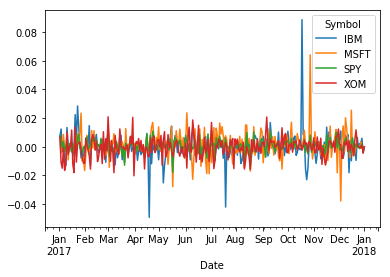

In [60]:
%matplotlib inline
returns.plot();

In [61]:
from scipy import stats

T-Test with p-value. Is the returns significantly different from zero?

In [62]:
for oo in returns.columns:
    print("{} \t {}".format(oo, stats.ttest_1samp(returns[oo], 0)))

IBM 	 Ttest_1sampResult(statistic=-0.4205707215208964, pvalue=0.6744173148634006)
MSFT 	 Ttest_1sampResult(statistic=2.238246348043851, pvalue=0.02605511950461849)
SPY 	 Ttest_1sampResult(statistic=2.6554355063814863, pvalue=0.008411633872026583)
XOM 	 Ttest_1sampResult(statistic=-0.6116025757271741, pvalue=0.5413371952094352)


### Bartlett’s test for equal variances


[doc](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.stats.bartlett.html)


Bartlett’s test tests the null hypothesis that all input samples are from populations with equal variances. For samples from significantly non-normal populations, Levene’s test levene is more robust.

In [ ]:
import scipy as sp 

In [ ]:
print(sp.stats.bartlett(returns["IBM"], returns["MSFT"]))

### Levene test for equal variances.

[doc](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.stats.levene.html)

The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

In [ ]:
print(sp.stats.levene(returns["IBM"], returns["MSFT"]))

### Jan Month Effect

In [ ]:
import pandas_datareader.data as web
from datetime import datetime
start = datetime(1960, 1, 1)
end = datetime(2018, 1, 1)
prices = web.DataReader('SPY', 'morningstar', start, end)

In [ ]:
prices['returns'] = prices['Close'].pct_change()

In [ ]:
prices.head()

In [ ]:
prices.tail()

In [ ]:
mth_price = prices.reset_index().set_index("Date")['Close'].resample('BM').last()
mth_price

In [ ]:
mth_rtns = mth_price.pct_change()
mth_rtns.head()

In [ ]:
jan_rtns = mth_rtns[mth_rtns.index.month==1]

In [ ]:
other_rtns = mth_rtns[mth_rtns.index.month!=1]

In [ ]:
import scipy as sp
print(sp.stats.bartlett(jan_rtns, other_rtns))

### 52 week high low range

In [ ]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [ ]:
prices.head()

In [ ]:
current_date = datetime.now()
one_yr_delta = current_date - relativedelta(years=1)
one_yr_delta

In [ ]:
prices.index.get_level_values(1)

In [ ]:
tmp = prices.reset_index().set_index('Date') 
print(tmp[tmp.index > one_yr_delta].head())
print(tmp[tmp.index > one_yr_delta].tail())
high = tmp[tmp.index > one_yr_delta]['Close'].max()
low = tmp[tmp.index > one_yr_delta]['Close'].min()

In [ ]:
current_price = float(tmp[tmp.index == tmp.index[-1]].Close)

In [ ]:
print("Current price, 52-week high-low : {}, {}, {}".format(current_price, high, low))

In [ ]:
tmp.Close.plot();

### Fama-French

In [ ]:
from pandas_datareader.famafrench import get_available_datasets
import pandas_datareader.data as web
import statsmodels.api as sm

In [ ]:
dataset = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench')

In [ ]:
print(dataset[0].head())
print(dataset[0].tail())

In [ ]:
start = datetime(2010, 1, 1)
end = datetime(2018, 1, 1)
prices = web.DataReader('XOM', 'morningstar', start, end)['Close']

In [ ]:
xom = prices.reset_index(level=0, drop=True).resample('BM').last()
rtns = xom.pct_change()
rtns.head()

In [ ]:
rtns = rtns.reset_index()
rtns

In [ ]:
rtns_date = []
for oo in rtns.Date:
    rtns_date.append(''.join([oo.strftime("%Y"), "-", oo.strftime("%m")]))

In [ ]:
rtns_date = pd.to_datetime(rtns_date, format="%Y-%m", errors="ignore").to_period()
rtns['mth_date'] = rtns_date
rtns = rtns.set_index('mth_date')
rtns.pop("Date")
rtns

In [ ]:
dataset[0]

In [ ]:
combined = rtns.join(dataset[0]).dropna()
combined

In [ ]:
y = combined.Close

In [ ]:
x = combined[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
x = sm.add_constant(x)

In [ ]:
results=sm.OLS(y,x).fit() 

In [ ]:
results.summary()

### Rolling Beta

In [ ]:
import pandas_datareader.data as web
from datetime import datetime
start = datetime(1990, 1, 1)
end = datetime(2018, 1, 1)
prices = web.DataReader(['SPY', 'IBM', 'MSFT', 'XOM'], 'morningstar', start, end)

In [ ]:
returns = prices["Close"].unstack(level=-1).T.dropna().resample('BM').last().pct_change().dropna()
returns

In [ ]:
import statsmodels.api as sm

In [ ]:
ibm = returns.IBM

In [ ]:
spy = returns.SPY

In [ ]:
beta= []
for oo in range(60,len(returns)):
    model = sm.OLS(sm.add_constant(ibm[:oo]), spy[:oo]).fit()
    beta.append([spy[:oo].index[-1], float(model.params[1])])
beta = pd.DataFrame(beta)
beta.columns = ['Date', 'beta']
beta = beta.set_index('Date')

In [ ]:
beta.plot();

### Efficient Frontier

Portfolio expected return

\begin{equation}
r_P = \sum^n_{i=1}w_ir_i
\end{equation}

\begin{equation}
r_P = w^Tr
\end{equation}

Variance for two-stocks portfolio

\begin{equation}
\sigma^2_P=w^2_1\sigma^2_1+w^2_2\sigma^2_2+2w_1w_2\sigma_{1,2}=w^2_1\sigma^2_1+w^2_2\sigma^2_2+2w_1w_2\rho\sigma_1\sigma_2
\end{equation}

Variance for multi-stocks portfolio

\begin{equation}
\sigma^2_P=w^T \sum w
\end{equation}



In [ ]:
import numpy as np

In [ ]:
np.random.seed(42)
returns = np.random.randint(0, 20, size=(10, 2)) / 100    # simulate returns
returns

In [ ]:
covariance = np.cov(returns.T)
covariance

In [ ]:
weight = np.array([0.2, 0.8])

In [ ]:
np.dot(weight.T, np.dot(np.cov(returns.T), weight))

In [ ]:
print("Portfolio variance: {}".format(float(np.dot(np.dot(weight, covariance), weight.T))))

In [ ]:
print("Portfolio expected return: {}".format(float(np.dot(weight.T, returns.mean(axis=0)))))

### Optimization 

[wolfram](http://www.wolframalpha.com/input/?i=x%5E2+-+4)

$$x^2 - 4x$$

In [ ]:
from scipy.optimize import minimize

In [ ]:
def f(x):
    return x**2 - 4

In [ ]:
x0 = 0

In [ ]:
result = minimize?

In [ ]:
result = minimize(f, x0, method="Nelder-Mead", options={"xtol" : 1e-10, 
                                                        'disp' : True})

In [ ]:
print(result.x)

In [ ]:
result.fun

### Portfolio Optimisation

#### Introduction

inspired by Yves Hilpisch excellent book `Python for Finance`

Portfolio expected return

\begin{equation}
r_P = \sum^n_{i=1}w_ir_i
\end{equation}

\begin{equation}
r_P = w^Tr
\end{equation}

Variance for two-stocks portfolio

\begin{equation}
\sigma^2_P=w^2_1\sigma^2_1+w^2_2\sigma^2_2+2w^2_1w^2_2\sigma_{1,2}w^2_1\sigma^2_1+w^2_2\sigma^2_2+2w^2_1w^2_2\rho\sigma_1\sigma_2
\end{equation}

Variance for multi-stocks portfolio

\begin{equation}
\sigma^2_P=w^T \sum w
\end{equation}



In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
#sns.set()

import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
start = datetime(2015, 1, 1)
end = datetime(2016, 1, 1)
tickers = ['TSLA', 'F', 'V', 'DIS', 'GLD']
prices = web.DataReader(tickers, 
                        'morningstar', start, end)
returns = prices["Close"].unstack(level=-1).T.dropna().pct_change().dropna()

In [ ]:
returns.columns

Annualised Mean

In [ ]:
print(returns.mean() * 250)

Variance - Covariance Matrix (Annualised)

In [ ]:
returns.cov() * 250

In [ ]:
portfolio_rtns = []
portfolio_vols = []
for oo in range(5000):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    portfolio_rtns.append(np.sum(weights * returns.mean() * 250))
    portfolio_vols.append(np.sqrt(float(np.dot(np.dot(weights, returns.cov() * 250), weights.T))))

In [ ]:
comb = pd.DataFrame([portfolio_rtns, portfolio_vols]).T
comb.columns = ['rtns', 'vols']
comb.head()

In [ ]:
#sns.set(style='whitegrid')
plt.figure(figsize=(8, 4))
plt.scatter(portfolio_vols, portfolio_rtns, 
            c = np.array(portfolio_rtns) / np.array(portfolio_vols))
plt.grid(True)
plt.xlabel('volatility')
plt.ylabel('return')
plt.colorbar(label='Sharpe ratio');
#plt.axis('equal');
#plt.xlim(0, 0.25);
#plt.ylim(-0.10, 0.2);

In [ ]:
 def portfolio_stats(weights):
        weights = np.array(weights)
        portfolio_rtn = np.sum(weights * returns.mean() * 250)
        portfolio_vol = np.sqrt(float(np.dot(np.dot(weights, returns.cov() * 250), weights.T)))
        return np.array([portfolio_rtn, portfolio_vol, portfolio_rtn / portfolio_vol])

In [ ]:
import scipy.optimize as sco

#### Maximise Sharpe Ratio

In [ ]:
def min_func_sharpe(weights):
    return - portfolio_stats(weights)[2]

In [ ]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

In [ ]:
bnds = tuple((0, 1) for x in range(len(tickers)))

In [ ]:
%%time 
opts = sco.minimize(min_func_sharpe, len(tickers) * [1. / len(tickers),], 
                    method='SLSQP',
                    bounds=bnds, 
                    constraints=cons)

In [ ]:
opts

In [ ]:
opts['x'].round(3)

In [ ]:
r, vol, sr = portfolio_stats(opts['x']).round(3)
print("Portfolio returns: {0}\nPortfolio volatility: {1}\nSharpe Ratio: {2}".format(r, vol, sr))

#### Minimise Variance

In [ ]:
def min_func_variance(weights):             
    return portfolio_stats(weights)[1] ** 2

In [ ]:
optv = sco.minimize(min_func_variance, len(tickers) * [1. / len(tickers),], 
                    method='SLSQP', bounds=bnds,
                    constraints=cons)

In [ ]:
optv

In [ ]:
optv['x'].round(3)

In [ ]:
r, vol, sr = portfolio_stats(optv['x']).round(3)
print("Portfolio returns: {0}\nPortfolio volatility: {1}\nSharpe Ratio: {2}".format(r, vol, sr))

#### Efficient Frontier

Minimum risk portfolio for given return level

In [ ]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},                 
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})         
bnds = tuple((0, 1) for x in weights)

In [ ]:
 def min_func_port(weights):             
        return portfolio_stats(weights)[1]

In [ ]:
%%time

trets = np.linspace(0.0, 0.18, 100)         
tvols = []         
for tret in trets:             
    cons = ({'type': 'eq', 'fun': lambda x:  portfolio_stats(x)[0] - tret},                     
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})             
    res = sco.minimize(min_func_port, 
                       len(tickers) * [1. / len(tickers),], 
                       method='SLSQP',                                
                       bounds=bnds, constraints=cons)             
    tvols.append(res['fun'])         
tvols = np.array(tvols)

In [ ]:
plt.figure(figsize=(20, 10))
plt.scatter(portfolio_vols, portfolio_rtns,                     
            c=np.array(portfolio_rtns) / np.array(portfolio_vols), 
            marker='o')                     
            # random portfolio composition         
plt.scatter(tvols, trets,    
            c=trets / tvols, marker='x')                     
            # efficient frontier         
plt.plot(portfolio_stats(opts['x'])[1], portfolio_stats(opts['x'])[0],                  
         'r*', markersize=15.0)                     
         # portfolio with highest Sharpe ratio         
plt.plot(portfolio_stats(optv['x'])[1], portfolio_stats(optv['x'])[0],                  
         'y*', markersize=15.0)                     
         # minimum variance portfolio         
plt.grid(True)         
plt.xlabel('expected volatility')         
plt.ylabel('expected return')         
plt.colorbar(label='Sharpe ratio');

#### Capital Market Line

In [ ]:
import scipy.interpolate as sci

In [ ]:
ind = np.argmin(tvols)         
evols = tvols[ind:]         
erets = trets[ind:] 

In [ ]:
tck = sci.splrep(evols, erets)

In [ ]:
 def f(x):             
        ''' Efficient frontier function (splines approximation). '''             
        return sci.splev(x, tck, der=0)         
    
def df(x):             
    ''' First derivative of efficient frontier function. '''             
    return sci.splev(x, tck, der=1) 

In [ ]:
def equations(p, rf=0.01):             
    eq1 = rf - p[0]             
    eq2 = rf + p[1] * p[2] - f(p[2])             
    eq3 = p[1] - df(p[2])             
    return eq1, eq2, eq3

In [ ]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])

In [ ]:
opt

In [ ]:
np.round(equations(opt), 6)

In [ ]:
plt.figure(figsize=(20, 10))         
plt.scatter(portfolio_vols, portfolio_rtns,                     
            c=(np.array(portfolio_rtns) - 0.01) / np.array(portfolio_vols), marker='o')                     
            # random portfolio composition         
plt.plot(evols, erets, 'g', lw=4.0)                     
            # efficient frontier         
cx = np.linspace(0.0, 0.3)         
plt.plot(cx, opt[0] + opt[1] * cx, lw=1.5)                     
            # capital market line         
plt.plot(opt[2], f(opt[2]), 'r*', markersize=15.0)         
plt.grid(True)         
plt.axhline(0, color='k', ls='--', lw=2.0)         
plt.axvline(0, color='k', ls='--', lw=2.0)         
plt.xlabel('expected volatility')         
plt.ylabel('expected return')         
plt.colorbar(label='Sharpe ratio');

In [ ]:
cons = ({'type': 'eq', 'fun': lambda x:  portfolio_stats(x)[0] - f(opt[2])},                 
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})         
res = sco.minimize(min_func_port, len(tickers) * [1. / len(tickers),], method='SLSQP',                                
                   bounds=bnds, constraints=cons)


In [ ]:
res['x'].round(3)

# Time Series 2

In [2]:
import pandas as pd
from datetime import datetime
prices = pd.read_csv("data/^GSPC.csv")

In [3]:
prices['Date'] = pd.to_datetime(prices["Date"], infer_datetime_format=True)
prices.set_index("Date", inplace=True)

In [4]:
prices.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-01,16.660000,17.090000,16.650000,17.049999,17.049999,42570000
1950-02-01,17.049999,17.350000,16.990000,17.219999,17.219999,33430000
1950-03-01,17.240000,17.610001,17.070000,17.290001,17.290001,40410000
1950-04-01,17.340000,18.070000,17.340000,18.070000,18.070000,48250000
1950-05-01,18.219999,18.780001,18.110001,18.780001,18.780001,45080000


In [5]:
mth_price = prices.resample('BM')['Adj Close'].last()
mth_rtns = mth_price.pct_change()

jan_rtns = mth_rtns[mth_rtns.index.month==1]
other_rtns = mth_rtns[mth_rtns.index.month!=1]

In [7]:
from scipy import stats
print(stats.bartlett(jan_rtns, other_rtns))

BartlettResult(statistic=4.599212108275581, pvalue=0.031986653036613084)


In [8]:
pre_90s = prices[prices.index < datetime(1990,1,1)]
pre_90s.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1989-08-01,346.079987,352.730011,339.000000,351.450012,351.450012,3949100000
1989-09-01,351.450012,354.130005,341.369995,349.149994,349.149994,3035020000
1989-10-01,349.149994,360.440002,327.119995,340.359985,340.359985,4012670000
1989-11-01,340.359985,346.500000,330.910004,345.989990,345.989990,3032160000
1989-12-01,346.010010,354.100006,339.630005,353.399994,353.399994,3213420000


In [9]:
pre_90s_mth_price = pre_90s['Adj Close']
pre_90s_mth_rtns = pre_90s_mth_price.pct_change()

In [10]:
pre_90s_jan_rtns = pre_90s_mth_rtns[pre_90s_mth_rtns.index.month==1]
pre_90s_other_rtns = pre_90s_mth_rtns[pre_90s_mth_rtns.index.month!=1]

In [11]:
print(stats.bartlett(pre_90s_jan_rtns, pre_90s_other_rtns))

BartlettResult(statistic=6.2331774447014991, pvalue=0.012537856336879023)


#### Heating Oil

[data](https://fred.stlouisfed.org/series/WHOILNYH)

In [68]:
import numpy as np
import datetime
import pandas as pd
df = pd.read_excel("data/WHOILNYH.xls", skiprows=10)
df.head()

,observation_date,WHOILNYH
0,1986-06-06,0.389
1,1986-06-13,0.384
2,1986-06-20,0.375
3,1986-06-27,0.374
4,1986-07-04,0.363


In [25]:
df.set_index("observation_date", inplace=True)

In [36]:
df_mth = df.resample('BM').last()

In [37]:
jul_price = df_mth[df_mth.index.month == 7]

In [38]:
jan_price = df_mth[df_mth.index.month == 1]

In [39]:
jul_price.head()

,WHOILNYH
observation_date,
1986-07-31,0.327
1987-07-31,0.542
1988-07-29,0.441
1989-07-31,0.487
1990-07-31,0.561


In [41]:
jan_price.head()

,WHOILNYH
observation_date,
1987-01-30,0.515
1988-01-29,0.493
1989-01-31,0.525
1990-01-31,0.611
1991-01-31,0.728


In [47]:
0.515- 0.327

0.188

In [48]:
0.493 - 0.542

-0.049000000000000044

In [55]:
res = (jan_price.values - jul_price.values)/jul_price.values

In [56]:
res.mean()

0.10816980919231184

In [57]:
res.std()

0.35130734584470585

In [80]:
res.mean() / res.std()

0.30790648266184539

In [58]:
type(res)

numpy.ndarray

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

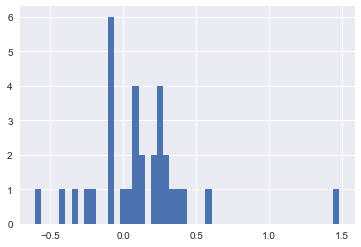

In [65]:
plt.hist(res, bins=50);

In [73]:
len(res[res < 0])

12

In [74]:
len(res[res > 0])

20

In [75]:
len(res)

32

In [78]:
res[res < 1.].mean()

0.063902101424321914

In [79]:
res[res < 1.].sum()

1.9809651441539795

In [81]:
res[res < 1.].mean() / res[res < 1.].sum()

0.032258064516129031

# Options

### Payoff Diagram

In [ ]:
def payoff_calls(S, K):
    return np.maximum(0., S - K)

In [ ]:
payoff_calls(80, 100)

In [ ]:
payoff_calls(120, 100)

In [ ]:
S = np.arange(10, 110, 10)
X = 50
payoff_calls(S, X)

In [ ]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(S, payoff_calls(S, X));

### Profit/Loss 

In [ ]:
call_premium = 2.5

In [ ]:
S = np.arange(40, 80, 10)
X = 50
pnl = payoff_calls(S, X) - call_premium
pnl

In [ ]:
plt.title("Profit / Loss")
plt.xlabel("Stock Price")
plt.ylabel("PnL")
plt.plot(S, pnl);
plt.plot(S, -pnl);
plt.annotate("Call Option Buyer", xy=(60, 10), xytext=(51, 15),
             arrowprops=dict(facecolor='blue', shrink=0.1), );
plt.annotate("Call Option Seller", xy=(60, -10), xytext=(51, -15),
             arrowprops=dict(facecolor='green', shrink=0.1), );
plt.axhline(0, ls='--', lw=1.0);
plt.axvline(50, ls='--', lw=1.0);
plt.annotate("Exercise Price", xy=(50, 0), xytext=(40, -10),
             arrowprops=dict(facecolor='k', shrink=0.1), );

***